In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
data_train=pd.read_csv('mnist_train.csv')
data_test=pd.read_csv('mnist_test.csv')

In [2]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)


#training_images = np.expand_dims(training_images, axis=3)
#testing_images = np.expand_dims(testing_images, axis=3)

training_images = data_train.iloc[:,1:].values
training_labels = data_train.iloc[:,0].values

testing_images = data_test.iloc[:,1:].values
testing_labels = data_test.iloc[:,0].values

training_images = training_images.reshape(-1,28,28,1)
testing_images = testing_images.reshape(-1,28,28,1)


print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28, 1)
# (27455,)
# (7172, 28, 28, 1)
# (7172,)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


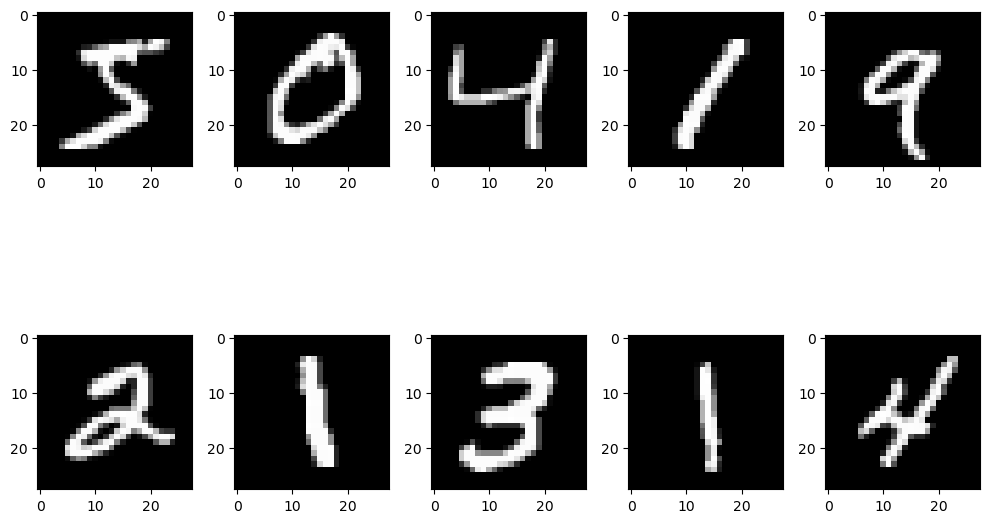

In [3]:
# Plotting the first 10 images 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,5) 
fig.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(training_images[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

In [4]:
# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1 / 255
)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model. 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=10,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)



model.evaluate(testing_images, testing_labels, verbose=0)

C:\Users\rajan\AppData\Local\Temp\ipykernel_34404\290978939.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),


Epoch 1/10
1875/1875 [==============================] - 106s 56ms/step - loss: 0.9553 - accuracy: 0.6776 - val_loss: 0.2926 - val_accuracy: 0.9082
Epoch 2/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.4393 - accuracy: 0.8600 - val_loss: 0.1522 - val_accuracy: 0.9514
Epoch 3/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.3387 - accuracy: 0.8920 - val_loss: 0.1170 - val_accuracy: 0.9642
Epoch 4/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.2844 - accuracy: 0.9092 - val_loss: 0.1561 - val_accuracy: 0.9491
Epoch 5/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2513 - accuracy: 0.9209 - val_loss: 0.1174 - val_accuracy: 0.9635
Epoch 6/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2369 - accuracy: 0.9249 - val_loss: 0.1353 - val_accuracy: 0.9548
Epoch 7/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2138 - accuracy: 0.9327 - val_loss: 0.0873 

[442.4830627441406, 0.4957999885082245]

In [5]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

NameError: name 'history' is not defined

313/313 [==============================] - 2s 5ms/step


C:\Users\rajan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajan\anaconda3\lib\site-packages\sklearn\metrics\_cla

              precision    recall  f1-score   support

     Class 0       1.00      0.31      0.47       980
     Class 1       1.00      0.01      0.02      1135
     Class 2       0.37      0.92      0.53      1032
     Class 3       0.62      0.97      0.76      1010
     Class 4       0.99      0.42      0.59       982
     Class 5       0.61      0.90      0.73       892
     Class 6       0.95      0.08      0.15       958
     Class 7       0.75      0.42      0.54      1028
     Class 8       0.30      0.99      0.47       974
    Class 10       0.00      0.00      0.00         0
    Class 11       0.00      0.00      0.00         0
    Class 12       0.00      0.00      0.00         0
    Class 13       0.00      0.00      0.00         0
    Class 14       0.00      0.00      0.00         0
    Class 15       0.00      0.00      0.00         0
    Class 16       0.00      0.00      0.00         0
    Class 17       0.00      0.00      0.00         0
    Class 18       0.00    

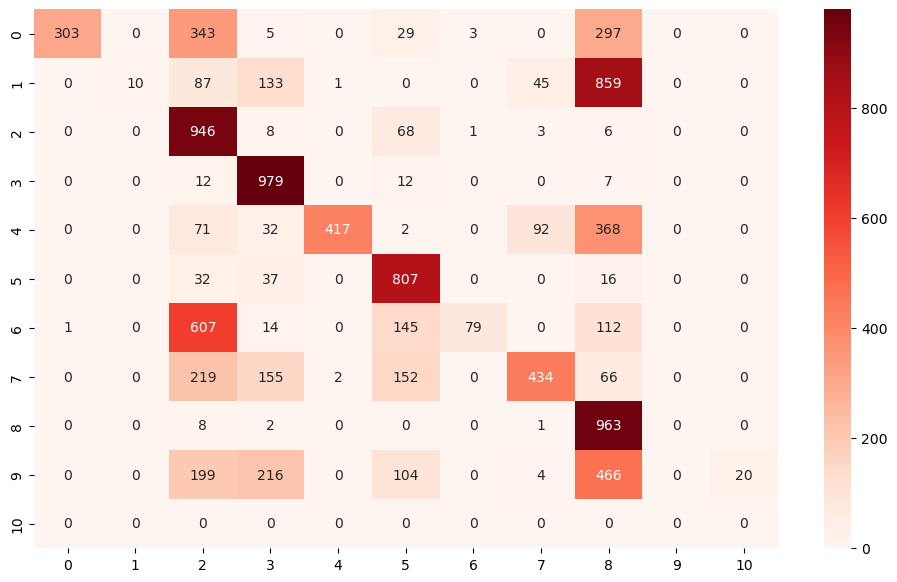

In [14]:
# Importing necessary modules
import matplotlib.pyplot as plt
import seaborn as sns

# Adjusted predictions
predictions = model.predict(testing_images)
predicted_labels = np.argmax(predictions, axis=1)

for i in range(len(predicted_labels)):
    if predicted_labels[i] >= 9:
        predicted_labels[i] += 1

# Precision, recall, f1-score for all the classes
from sklearn.metrics import classification_report, confusion_matrix

classes = ["Class " + str(i) for i in range(26) if i != 9]
labels = [i for i in range(26) if i != 9]
print(classification_report(data_test['label'], predicted_labels, labels=labels, target_names=classes))

# Confusion Matrix for the model predictions
cm = confusion_matrix(data_test['label'], predicted_labels)

plt.figure(figsize=(12, 7))
g = sns.heatmap(cm, cmap='Reds', annot=True, fmt='')

plt.show()
